In [1]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
from scipy.stats import pointbiserialr
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_csv('/Users/pinkyalapati/Desktop/GRID_as_csv_tables/20240314-GRID_PERPS.csv')

# Filter out the columns for weapons, targets, and tactics
weapon_columns = [col for col in df if col.startswith('weapon_lvl1_')]
target_columns = [col for col in df if col.startswith('intended_victim_lvl1_')]
tactic_columns = [col for col in df if col.startswith('tactic_lvl1_')]

# Initialize a DataFrame to store the correlation results
correlation_data = {
    'Pair': [],
    'Correlation': [],
    'P-value': []
}

# Calculate point-biserial correlations for weapons and tactics
for weapon in weapon_columns:
    for tactic in tactic_columns:
        corr, p_val = pointbiserialr(df[weapon], df[tactic])
        correlation_data['Pair'].append(f"{weapon} x {tactic}")
        correlation_data['Correlation'].append(corr)
        correlation_data['P-value'].append(p_val)

# Calculate point-biserial correlations for targets and tactics
for target in target_columns:
    for tactic in tactic_columns:
        corr, p_val = pointbiserialr(df[target], df[tactic])
        correlation_data['Pair'].append(f"{target} x {tactic}")
        correlation_data['Correlation'].append(corr)
        correlation_data['P-value'].append(p_val)

# Convert the dictionary to a DataFrame
correlation_df = pd.DataFrame(correlation_data)
colours = [victims_colors.get(pair.split(' x ')[0], 'gray') for pair in correlation_df['Pair']]
victims_colors = {
    'Groups_victims':'lime',
    'Government_victims':'cyan',
    'General Population_victims': 'mint',
    'Military_victims':'coral',
    'Other_victims':'beige',
    'Political_victims':'brown',
    'Professions_victims':'pink',
    'None_victims':'teal'
    
}

# Optionally, save the correlation results to a CSV file
# correlation_df.to_csv('correlation_results.csv', index=False)

# Now we can visualize the correlations using a bar plot
# For the sake of simplicity, let's visualize only the first few correlations
plt.figure(figsize=(16, 14))
sns.barplot(x='Correlation', y='Pair', data=correlation_df.head(30))
plt.title('Point-Biserial Correlation between Variables')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Variable Pairs')
plt.show()

plt.figure(figsize=(16, 14))
sns.barplot(x='Correlation', y='Pair', data=correlation_df.tail(30))
plt.title('Point-Biserial Correlation between Variables')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Variable Pairs')
plt.show()

colors = [weapon_colors.get(pair.split(' x ')[0], 'gray') for pair in correlation_df['Pair']]


# The rest of the code remains the same...
plt.figure(figsize=(16, 14))
ax=sns.barplot(x='Correlation', y='Pair', data=correlation_df.head(30),palette=colors )
ax.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray', zorder=0)
plt.title('Point-Biserial Correlation between Variables')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Variable Pairs')
plt.show()

plt.figure(figsize=(16, 14))
sns.barplot(x='Correlation', y='Pair', data=correlation_df.tail(30), palette=colours)
plt.title('Point-Biserial Correlation between Variables')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Variable Pairs')
plt.show()


/Users/pinkyalapati/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/pinkyalapati/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (
/var/folders/x4/tl7cq1gs04q66d9vjws8mjp40000gn/T/ipykernel_5821/475796973.py:7: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/Users/pinkyalapati/Desktop/GRID_as_csv_tables/20240314-GRID_PERPS.csv')


NameError: name 'victims_colors' is not defined

/var/folders/x4/tl7cq1gs04q66d9vjws8mjp40000gn/T/ipykernel_22078/3647642360.py:7: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/Users/pinkyalapati/Desktop/GRID_as_csv_tables/20240314-GRID_PERPS.csv')
/var/folders/x4/tl7cq1gs04q66d9vjws8mjp40000gn/T/ipykernel_22078/3647642360.py:107: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Correlation', y='Pair', data=correlation_df.head(30), palette=colors)
/var/folders/x4/tl7cq1gs04q66d9vjws8mjp40000gn/T/ipykernel_22078/3647642360.py:107: UserWarning: The palette list has more values (96) than needed (30), which may not be intended.
  sns.barplot(x='Correlation', y='Pair', data=correlation_df.head(30), palette=colors)


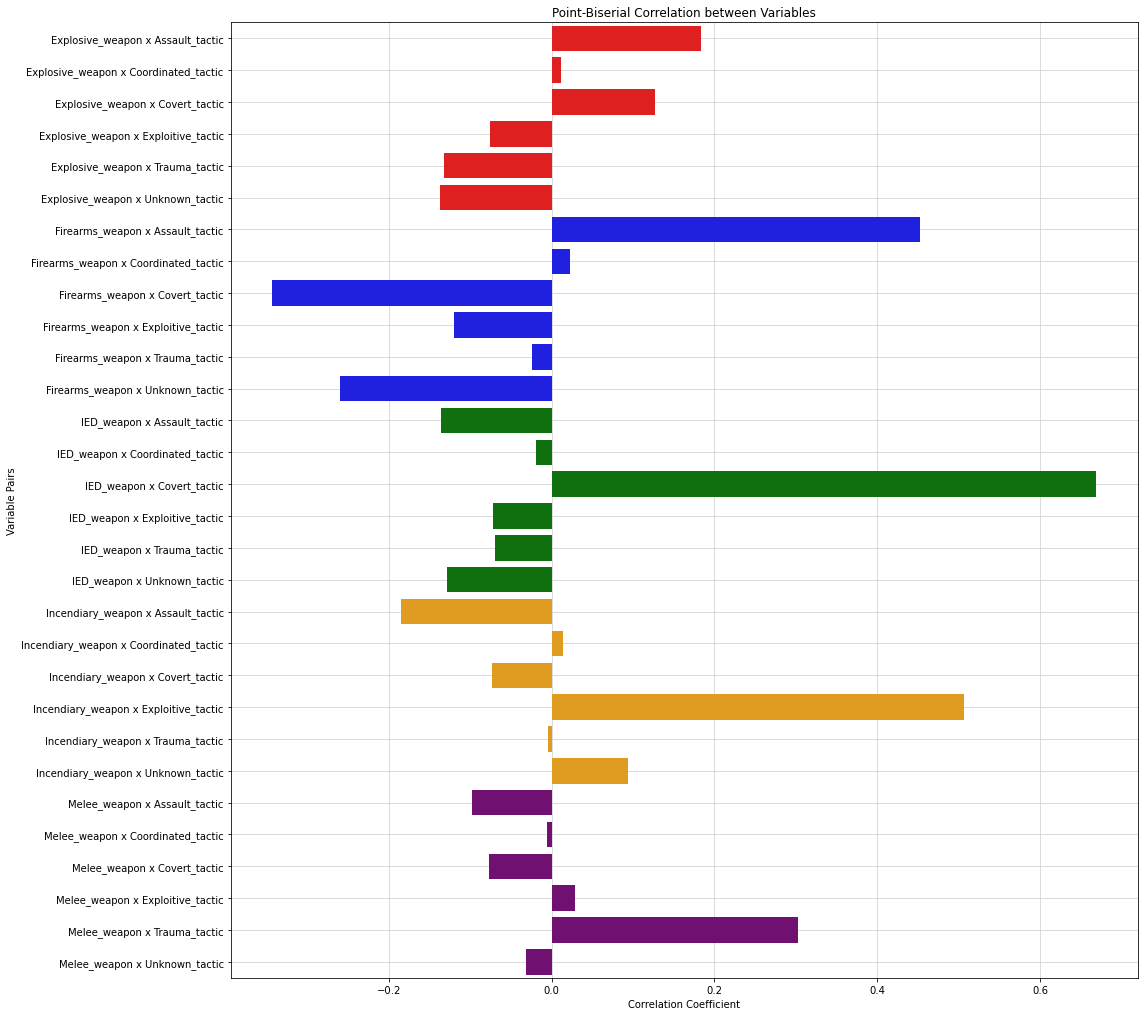

In [10]:
import pandas as pd
from scipy.stats import pointbiserialr
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('/Users/pinkyalapati/Desktop/GRID_as_csv_tables/20240314-GRID_PERPS.csv')

# Rename the columns using the provided dictionary
rename_dict = {
    'weapon_lvl1_ex': 'Explosive_weapon',
    'weapon_lvl1_fi':'Firearms_weapon',
    'weapon_lvl1_im':'IED_weapon',
    'weapon_lvl1_in':'Incendiary_weapon',
    'weapon_lvl1_ml':'Melee_weapon',
    'weapon_lvl1_ot':'Other_weapon',
    'weapon_lvl1_ua':'UAV_weapon',
    'weapon_lvl1_un':'Unknown_weapon',
    'intended_victim_lvl1_ci': 'Groups_victims',
    'intended_victim_lvl1_go':'Government_victims',
    'intended_victim_lvl1_gp':'General Population_victims',
    'intended_victim_lvl1_mi':'Military_victims',
    'intended_victim_lvl1_ot':'Other_victims',
    'intended_victim_lvl1_po':'Political_victims',
    'intended_victim_lvl1_pr':'Professions_victims',
    'intended_victim_lvl1_nn':'None_victims',
    'tactic_lvl1_tr':'Trauma_tactic',
    'tactic_lvl1_as':'Assault_tactic',
    'tactic_lvl1_cv':'Covert_tactic',
    'tactic_lvl1_co':'Coordinated_tactic',
    'tactic_lvl1_ex':'Exploitive_tactic',
    'tactic_lvl1_un':'Unknown_tactic'
}
df.rename(columns=rename_dict, inplace=True)

# Initialize the DataFrame to store the correlation results
correlation_data = {
    'Pair': [],
    'Correlation': [],
    'P-value': []
}

# Define lists of individual column names after renaming
weapon_columns = [col for col in df.columns if '_weapon' in col]
target_columns = [col for col in df.columns if '_victims' in col]
tactic_columns = [col for col in df.columns if '_tactic' in col]

# Ensure weapon_columns, tactic_columns, and target_columns are lists of strings
# Each string should be the name of a column in df

# Calculate the point-biserial correlations for weapons, targets, and tactics
for weapon in weapon_columns:
    for tactic in tactic_columns:
        # Make sure df[weapon] and df[tactic] are Series by selecting single columns
        corr, p_val = pointbiserialr(df[weapon], df[tactic])
        correlation_data['Pair'].append(f"{weapon} x {tactic}")
        correlation_data['Correlation'].append(corr)
        correlation_data['P-value'].append(p_val)

# Repeat for target and tactic correlations
for target in target_columns:
    for tactic in tactic_columns:
        # Make sure df[target] and df[tactic] are Series by selecting single columns
        corr, p_val = pointbiserialr(df[target], df[tactic])
        correlation_data['Pair'].append(f"{target} x {tactic}")
        correlation_data['Correlation'].append(corr)
        correlation_data['P-value'].append(p_val)

# Convert the dictionary to a DataFrame
correlation_df = pd.DataFrame(correlation_data)

weapon_colors = {
    'Explosive_weapon': 'red',
    'Firearms_weapon': 'blue',
    'IED_weapon': 'green',
    'Incendiary_weapon': 'orange',
    'Melee_weapon': 'purple',
    'Other_weapon':'black',
    'UAV_weapon':'lavender',
    'Unknown_weapon':'olive'
    # ... (other colors as needed)
}

victim_colors = {
    'Groups_victims': 'lime',
    'Government_victims': 'cyan',
    'General Population_victims': 'navy',
    'Military_victims': 'coral',
    'Other_victims': 'beige',
    'Political_victims': 'brown',
    'Professions_victims': 'pink',
    'None_victims': 'teal'
}

colors = []
for pair in correlation_df['Pair']:
    key = pair.split(' x ')[0]
    if key in weapon_colors:
        colors.append(weapon_colors[key])
    elif key in victim_colors:
        colors.append(victim_colors[key])
    else:
        colors.append('gray')  # Default color if no specific color is assigned

# Plotting the bar chart with color coding and grid lines
plt.figure(figsize=(16, 14))
sns.barplot(x='Correlation', y='Pair', data=correlation_df.head(30), palette=colors)
plt.grid(True, which='both', color='lightgrey', linestyle='-', linewidth=0.8, zorder = 0)
plt.gca().set_axisbelow(True)
plt.tight_layout()
plt.title('Point-Biserial Correlation between Variables')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Variable Pairs')
plt.show()


